# Code Violations Notebook - Code for Canada practice

Write a brief program in the language of your choice to summarize the data. Your program should calculate:
* The number of violations in each category
* The earliest and latest violation date for each category


In [1]:
# Import libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
df = pd.read_csv('http://codefor.ca/wp-content/uploads/2018/06/C4C-dev-challenge-2018.csv')

In [3]:
df.head()

,violation_id,inspection_id,violation_category,violation_date,violation_date_closed,violation_type
0,204851,261019,Garbage and Refuse,2012-01-03 0:00,2012-02-02 0:00,Refuse Accumulation
1,204852,261019,Unsanitary Conditions,2012-01-03 0:00,2012-02-02 0:00,"Unsanitary conditions, not specified"
2,204853,261023,Garbage and Refuse,2012-01-03 0:00,2012-01-17 0:00,Refuse Accumulation
3,204854,261023,Garbage and Refuse,2012-01-03 0:00,2012-01-17 0:00,Refuse Accumulation
4,204858,261029,Garbage and Refuse,2012-01-03 0:00,2012-03-12 0:00,Refuse Accumulation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
violation_id             545 non-null int64
inspection_id            545 non-null int64
violation_category       545 non-null object
violation_date           545 non-null object
violation_date_closed    429 non-null object
violation_type           545 non-null object
dtypes: int64(2), object(4)
memory usage: 25.6+ KB


In [5]:
df.describe(include=['object'])

,violation_category,violation_date,violation_date_closed,violation_type
count,545,545,429,545
unique,9,171,177,43
top,Animals and Pests,2012-04-03 0:00,2012-07-24 0:00,Refuse Accumulation
freq,180,14,13,106


In [6]:
# Counts in each category
df.violation_category.value_counts()

Animals and Pests           180
Garbage and Refuse          126
Unsanitary Conditions        83
Vegetation                   67
Building Conditions          62
Chemical Hazards             17
Biohazards                    7
Air Pollutants and Odors      2
Retail Food                   1
Name: violation_category, dtype: int64

In [7]:
# Converting dates to datetime objects
df.violation_date = pd.to_datetime(df.violation_date)
df.violation_date_closed = pd.to_datetime(df.violation_date_closed)

In [8]:
df.head()

,violation_id,inspection_id,violation_category,violation_date,violation_date_closed,violation_type
0,204851,261019,Garbage and Refuse,2012-01-03,2012-02-02,Refuse Accumulation
1,204852,261019,Unsanitary Conditions,2012-01-03,2012-02-02,"Unsanitary conditions, not specified"
2,204853,261023,Garbage and Refuse,2012-01-03,2012-01-17,Refuse Accumulation
3,204854,261023,Garbage and Refuse,2012-01-03,2012-01-17,Refuse Accumulation
4,204858,261029,Garbage and Refuse,2012-01-03,2012-03-12,Refuse Accumulation


In [9]:
# The earliest violation date for each category
df.groupby('violation_category').min()['violation_date']

violation_category
Air Pollutants and Odors   2012-12-05
Animals and Pests          2012-01-03
Biohazards                 2012-04-13
Building Conditions        2012-01-12
Chemical Hazards           2012-02-08
Garbage and Refuse         2012-01-03
Retail Food                2012-12-20
Unsanitary Conditions      2012-01-03
Vegetation                 2012-02-01
Name: violation_date, dtype: datetime64[ns]

In [10]:
# The latest violation date for each category
df.groupby('violation_category').max()['violation_date']

violation_category
Air Pollutants and Odors   2012-12-19
Animals and Pests          2012-12-28
Biohazards                 2012-12-18
Building Conditions        2012-12-26
Chemical Hazards           2012-12-06
Garbage and Refuse         2012-12-21
Retail Food                2012-12-20
Unsanitary Conditions      2012-12-19
Vegetation                 2012-12-05
Name: violation_date, dtype: datetime64[ns]

### Visualizations


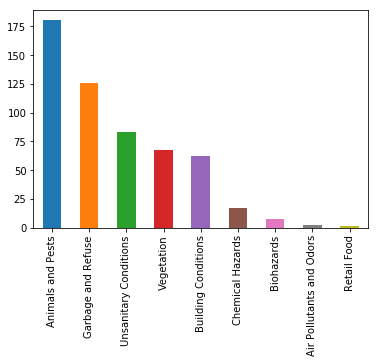

In [11]:
graph = df.violation_category.value_counts().sort_values(ascending=False)
graph.plot(kind='bar')

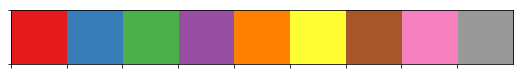

In [12]:
sns.palplot(sns.color_palette("Set1",9))

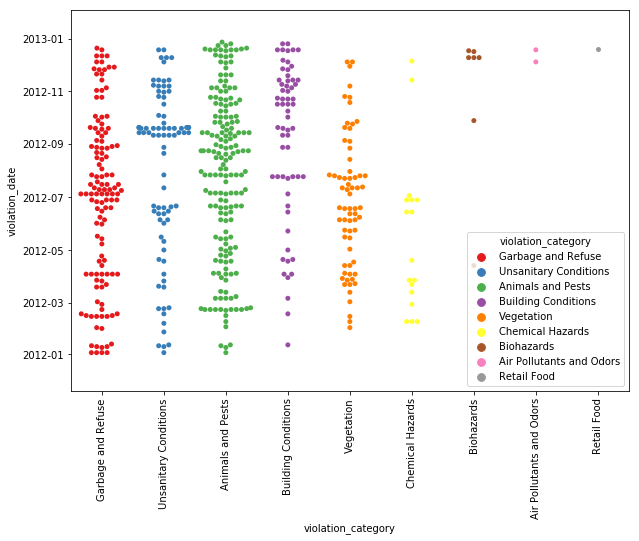

In [13]:
fig, ax = plt.subplots(figsize=(10,7))
graph2 = df[['violation_category','violation_date']]
#graph2.groupby('violation_date').count().unstack()['violation_category'].plot(ax=ax);
#sns.lineplot(data=graph2, hue='violation_category')
sns.swarmplot(y='violation_date', x = 'violation_category', hue='violation_category', palette=sns.color_palette("Set1", 9), 
              data=graph2, ax=ax)
ax.tick_params(axis='y', grid_color='black', grid_alpha=0.6)
plt.xticks(rotation= 90);

In [14]:
categories = pd.unique(graph2.violation_category.values)
df_list = []
for category in categories:
    df_temp = graph2.query('violation_category == @category').groupby(
        graph2.violation_date.dt.to_period('M').rename('date')).count()['violation_date']
    df_temp = pd.DataFrame(df_temp.T) #.reset_index(inplace=True)
    df_temp.reset_index(inplace=True)
    df_temp.columns = ['validation_date', 'counts']
    
    df_list.append(df_temp)

df_list

[   validation_date  counts
 0          2012-01      10
 1          2012-02      11
 2          2012-03       6
 3          2012-04      11
 4          2012-05       4
 5          2012-06      13
 6          2012-07      24
 7          2012-08      13
 8          2012-09      11
 9          2012-10       5
 10         2012-11      11
 11         2012-12       7,    validation_date  counts
 0          2012-01       5
 1          2012-02       5
 2          2012-03       3
 3          2012-04       3
 4          2012-05       3
 5          2012-06      12
 6          2012-07       2
 7          2012-08       2
 8          2012-09      26
 9          2012-10       6
 10         2012-11      10
 11         2012-12       6,    validation_date  counts
 0          2012-01       4
 1          2012-02      14
 2          2012-03       9
 3          2012-04      14
 4          2012-05       9
 5          2012-06      15
 6          2012-07      20
 7          2012-08      22
 8          2012-09 

In [15]:
df_test = graph2.query('violation_category == "Garbage and Refuse"').groupby(
    graph2.violation_date.dt.to_period('M').rename('date')).count()['violation_date']
#df_test.reset_index(inplace=True)
df_test = pd.DataFrame(df_test.T) 
df_test.reset_index(inplace=True)
df_test.columns = ['violation_date','counts']
df_test
#df_test.index.tolist()

,violation_date,counts
0,2012-01,10
1,2012-02,11
2,2012-03,6
3,2012-04,11
4,2012-05,4
5,2012-06,13
6,2012-07,24
7,2012-08,13
8,2012-09,11
9,2012-10,5


In [16]:
df_dates = df.groupby('violation_category').aggregate(['min','max'])['violation_date'].reset_index()
df_dates

,violation_category,min,max
0,Air Pollutants and Odors,2012-12-05,2012-12-19
1,Animals and Pests,2012-01-03,2012-12-28
2,Biohazards,2012-04-13,2012-12-18
3,Building Conditions,2012-01-12,2012-12-26
4,Chemical Hazards,2012-02-08,2012-12-06
5,Garbage and Refuse,2012-01-03,2012-12-21
6,Retail Food,2012-12-20,2012-12-20
7,Unsanitary Conditions,2012-01-03,2012-12-19
8,Vegetation,2012-02-01,2012-12-05
